# Task 2: End-to-End ML Pipeline with Scikit-learn

###  Problem Statement
Telecom companies lose significant revenue due to customer churn. By predicting churn, they can proactively retain customers.

###  Objective
- Build an end-to-end ML pipeline to predict customer churn.
- Use preprocessing steps like scaling and encoding.
- Train models: Logistic Regression & Random Forest.
- Tune with GridSearchCV and export pipeline with joblib.


**Dataset Loading & Preprocessing**

Step 1: Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Step 2: Load dataset

In [2]:

df = pd.read_csv("Telco-Customer-Churn.csv")

Step 3: Basic cleanup

In [ ]:
df.drop('customerID', axis=1, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Handle total charges (some values are blank)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\PC Partner-User1\AppData\Local\Temp\ipykernel_7408\3739295290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Step 4: Define features and target

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Step 5: Split columns by type

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

**Model Development & Pipeline Construction**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Preprocessing for numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [9]:
# Preprocessing for categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [11]:
# Build model pipeline (using Random Forest)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

**Hyperparameter Tuning with GridSearchCV**

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20]
}

In [13]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

# Apply GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best CV Accuracy: 0.7996088264636304


 **Evaluation with Metrics**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = grid_search.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[938  98]
 [177 196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



**Visualizations** 

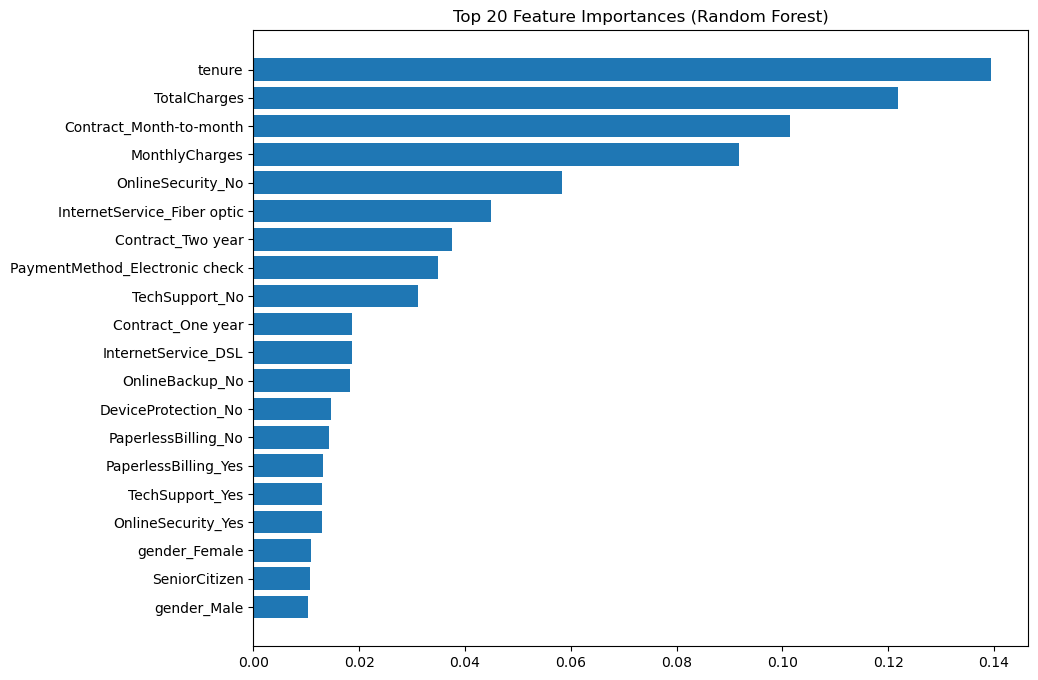

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
best_model = grid_search.best_estimator_.named_steps['classifier']

importances = best_model.feature_importances_
onehot_features = list(
    grid_search.best_estimator_.named_steps['preprocessor']
    .transformers_[1][1]
    .named_steps['encoder']
    .get_feature_names_out(categorical_features)
)

all_features = numeric_features + onehot_features

# Plot top 20 features
plt.figure(figsize=(10, 8))
indices = np.argsort(importances)[::-1][:20]
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


**Export Final Pipeline**

In [17]:
import joblib

# Save final model pipeline
joblib.dump(grid_search.best_estimator_, 'telco_churn_pipeline.pkl')


['telco_churn_pipeline.pkl']

**prediction**

In [19]:
import pandas as pd

# Define a new customer (matching the original feature columns)
new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.35,
    'TotalCharges': 350.5
}])

# Predict using the trained pipeline
prediction = grid_search.predict(new_customer)

# Show result
print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")


Churn Prediction: Yes


In [20]:
import pandas as pd

new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 3,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 78.5,
    'TotalCharges': 210.3
}])

prediction = grid_search.predict(new_customer)

print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")


Churn Prediction: Yes
